In [25]:
import cv2
import os, sys
import copy
import torch
import yaml

import numpy as np
from time import time

from utils.parameter import read_image

from utils_point.my_point_model import create_pointextract_instance, create_pointmatch_instance
opencv_method = ["orb"]

In [26]:
yamlPath = "/home/nnplvio_r2d2_ws/src/sp-sold2-vins/config/feature_tracker/euroc_config.yaml"
with open(yamlPath,'rb') as f:
    params = yaml.load(f, Loader=yaml.FullLoader)
    point_params = params["point_feature_cfg"]
    camera_params = params["camera_cfg"]
    extract_method = point_params["extract_method"]
    opencv =0


my_pointextract_model = create_pointextract_instance(point_params)  # 建立自定义点特征提取模型
my_pointmatch_model = create_pointmatch_instance(point_params)  # 建立自定义点特征匹配模型
# camera_model = CameraModel(camera_params)   
# CameraIntrinsicParam = camera_model.generateCameraModel()   # 建立相机模型
# feature_tracker = FeatureTracker(my_pointextract_model, my_pointmatch_model, CameraIntrinsicParam,
#                                     min_cnt=point_params["min_cnt"], opencv=opencv) # 利用点特征模型和相机模型生成点特征处理器

ValueError: Extract method harris is not supported!

In [21]:
# img0 = np.load("/home/nnplvio_r2d2_ws/src/sp-sold2-vins/notebook/img/0.npy")
# img1 = np.load("/home/nnplvio_r2d2_ws/src/sp-sold2-vins/notebook/img/1.npy")
img0 = cv2.imread("/home/sharedocker/img/0.png", 0)
img1 = cv2.imread("/home/sharedocker/img/6.png", 0)
img = cv2.imread("/home/sharedocker/img/6.png")
# print(img0.shape)
keyPoint0, pointdescriptor0 =  my_pointextract_model.extract(img0)
keyPoint1, pointdescriptor1 =  my_pointextract_model.extract(img1)

print(keyPoint0.shape, keyPoint1.shape)

(3, 962) (3, 951)


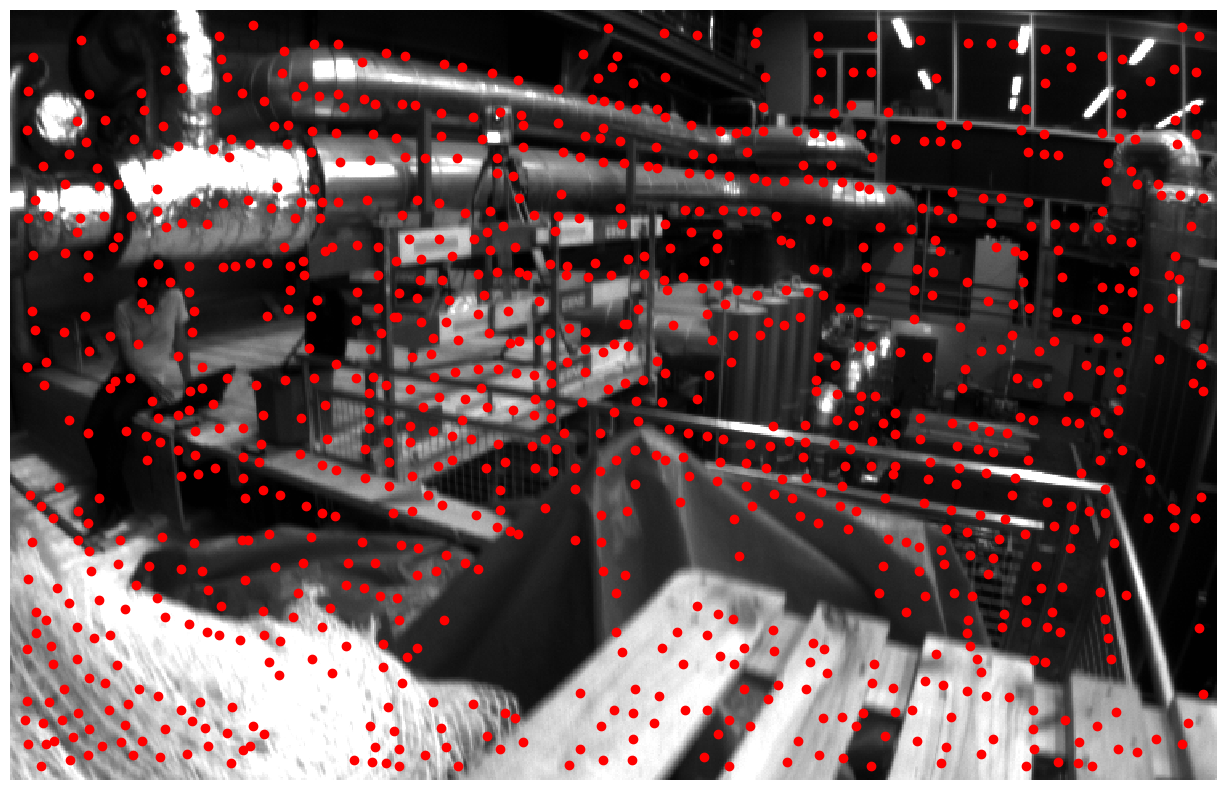

In [22]:
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1, 1, figsize=(20, 10))
# Display images side by side
ax1.imshow(img)
# ax2.imshow(img1)
ax1.axis('off')
for i in range(keyPoint0.shape[1]):
    # Extract matching points coordinates
    point = keyPoint0[:, i]
    # point2 = keyPoint1[:-1, i]
    
    # Convert points to integers
    # point1 = tuple(map(int, point1))
    # point2 = tuple(map(int, point2))
    
    # Draw lines on the images
    ax1.plot([point[0]], [point[1]], 'ro')  # First image point
    # ax1.text(point1[0], point1[1], str(i))
    # ax2.plot([point2[0]], [point2[1]], 'ro')  # Second image point
    # ax2.text(point2[0], point2[1], str(i))

In [4]:
matches = my_pointmatch_model.match({
										"descriptors0": pointdescriptor0,
	  									"descriptors1": pointdescriptor1,
										"keypoints0": keyPoint0,
										"keypoints1": keyPoint1,
										"shape": img0.shape
									})
print(matches.shape)


(3, 918)


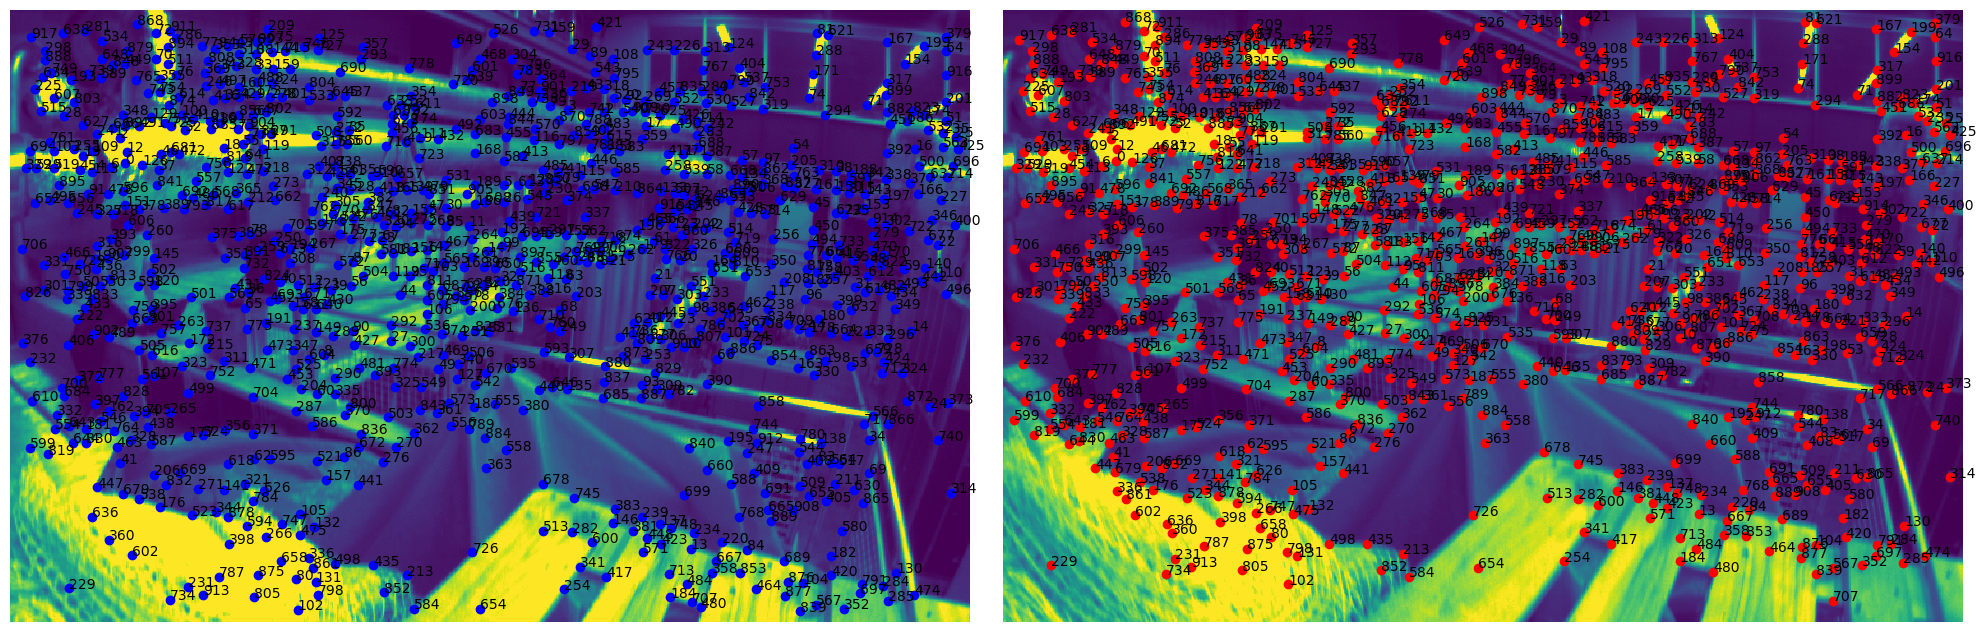

In [5]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
# Display images side by side
ax1.imshow(img0)
ax2.imshow(img1)
ax1.axis('off')
ax2.axis('off')
# Set the limits for the x-axis to match the image widths
# ax1.set_xlim(0, img0.shape[1])
# ax2.set_xlim(img0.shape[1], img0.shape[1] + img1.shape[1])
# # Set the limits for the y-axis to match the image height
# ax1.set_ylim(img0.shape[0], 0)
# ax2.set_ylim(img1.shape[0], 0)
# # Draw matching lines using the matches coordinates
for i in range(matches.shape[1]):
    # Extract matching points coordinates
    point1 = keyPoint0[:, int(matches[0, i])]
    point2 = keyPoint1[:, int(matches[1, i])]
    
    # Convert points to integers
    # point1 = tuple(map(int, point1))
    # point2 = tuple(map(int, point2))
    
    # Draw lines on the images
    ax1.plot([point1[0]], [point1[1]], 'bo')  # First image point
    ax1.text(point1[0], point1[1], str(i))
    ax2.plot([point2[0]], [point2[1]], 'ro')  # Second image point
    ax2.text(point2[0], point2[1], str(i))

    # ax1.plot([point1[0], img0.shape[1]+point2[0]], [point1[1], point2[1]], c='g', linestyle='--', label='Match')
# Set the aspect ratio to be the same for both subplots
plt.tight_layout()
# Show the plot
plt.show()


In [137]:
# class my_track_point:
#     def __init__(self, point:None, desc: None, id: None):
#         self.point = point
#         self.desc = desc
#         self.id = id

# my_track_points = [my_track_point() for _ in range(10)]
# for i in range(10):
#     img = cv2.imread("/home/sharedocker/img/"+i+".png", 0)
#     keyPoint, pointdescriptor =  my_pointextract_model.extract(img)
#     if i == 0:
#         for j in range(keyPoint.shape[1]):
#             my_track_point[i].point = keyPoint
#             my_track_point[i].desc = pointdescriptor
#             my_track_point[i].id = 

# img1 = cv2.imread("/home/sharedocker/img/18.png", 0)

# # print(img0.shape)
# keyPoint0, pointdescriptor0 =  my_pointextract_model.extract(img0)
# keyPoint1, pointdescriptor1 =  my_pointextract_model.extract(img1)

# print(keyPoint0.shape, keyPoint1.shape)

In [138]:
import numpy as np
            
vecpoint_tracked = np.zeros((3,0))
pointID_tracked = []
descr_tracked = np.zeros((256,0))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
for i in range(10):
    vecpoint_new = np.zeros((3,0))
    pointID_new = []
    descr_new = np.zeros((128,0))

    img = cv2.imread("/home/sharedocker/img/"+str(i)+".png", 0)
    keyPoint, pointdescriptor =  my_pointextract_model.extract(img)
    num_points = keyPoint.shape[1]

    if i == 0:
        # ax1.imshow(img)
        vecpoint_tracked = keyPoint
        pointID_tracked = np.arange(num_points)
        descr_tracked = pointdescriptor
        continue
    matches = my_pointmatch_model.match({
										"descriptors0": descr_tracked,
	  									"descriptors1": pointdescriptor,
										"keypoints0": vecpoint_tracked,
										"keypoints1": keyPoint,
										"shape": img.shape
									})
    matches_num = matches.shape[1]
    for j in range(matches_num):
        index_l = int(matches[0,j])
        index_r = int(matches[1,j])
        vecpoint_new=np.append(vecpoint_new, keyPoint[:,index_r:index_r+1], axis=1)
        descr_new=np.append(descr_new, pointdescriptor[:,index_r:index_r+1], axis=1)
    vecpoint_tracked = vecpoint_new
    descr_tracked = descr_new
    print(keyPoint.shape, vecpoint_tracked.shape)

    # for k in range(matches_num):
    #     # Extract matching points coordinates
    #     point = vecpoint_tracked[:,k]
    #     # point2 = keyPoint1[:-1, int(matches[1, i])]
        
    #     # Convert points to integers
    #     # point1 = tuple(map(int, point1))
    #     # point2 = tuple(map(int, point2))
        
    #     # Draw lines on the images
    #     # ax1.plot([point1[0]], [point1[1]], 'bo')  # First image point
    #     # ax1.text(point1[0], point1[1], str(i))
    #     x = int(point[0])
    #     y = int(point[1])
    #     ax2.plot([x], [y], 'ro')  # Second image point
    #     ax2.text(x, y, str(k))
    #     plt.tight_layout()
    #     # Show the plot
    #     plt.show()



ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 3 and the array at index 1 has size 2

superglue tracking is bad